# Bang for your buck

This is an explanatory notebook for the final project in the course Social Data Analysis and Visualization at DTU, in the Spring semester 2020.

## Table of Contents
1. [Motivation](#motivation)
2. [Basic stats](#basicStats)
3. [Data Analysis](#dataAnalysis)
4. [Genre](#genre)
5. [Visualizations](#visualizations)
> See apendix containing Bokeh plot code [\[here\]](https://nbviewer.jupyter.org/github/goh12/socialdataanalysis2020-finalproject/blob/master/Explanatory/merged_visualization_code.ipynb)
6. [Discussion](#discussion)
7. [Contributions](#contributions)

### 1. Motivation. <a name="motivation"></a>
 * **What is your dataset?**

    > The dataset for this project has residential property descriptions and address point information in Washington D.C., the newest information is from July 2018.  The data is provided by D.C. Geographic Information System. All the raw data is available on [Open data D.C.](https://opendata.dc.gov/). The sources of information have been merged into one main dataset which can be retrieved from [https://www.kaggle.com/christophercorrea/dc-residential-properties](https://www.kaggle.com/christophercorrea/dc-residential-properties)

 * **Why did you choose this/these particular dataset(s)?**
 
    > We explored many different datasets when deciding on a project, we wanted to find an original project that would be fun and exciting to explore. When other datasets were explored we had to take into consideration the completeness of the dataset. If it was too "messy" we went to the next dataset. If the data was clean enough a discussion was made regarding possible project ideas and which path we could explore using the dataset we were looking into. After going through several datasets we found this one, the dataset seemed clean enough to work with and we were able to formulate an interesting idea that we wanted to pursue further. 

 * **What was your goal for the end user's experience?**
     > The project is called "Bang for your buck". It is based on the fact that buying real estate is a hard decision. The project's purpose is to communicate how various property characteristics play a part when a price is set. Our goal for the end user's experience is to provide a nice visual narrative that can explain how different features affect the pricing of real estate. We want the user to consider and be aware of different aspects of a property when looking to buy.  


### 2. Basic stats. <a name="basicStats"></a>
 * **Write about your choices in data cleaning and preprocessing**
    > During the data cleaning and preprocessing phase, we want to get to know the data and get a good overview of different characteristics. The dataset used contains a lot of different features that can be modified during preprocessing. One of the first things we did during the initial exploration was to get a general feeling of the completeness of the data, whether features of the data set are missing in many cases or not. We used the plot below to get the overview of the completeness. 
    
    
    
 * **Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.**
     > The discussion is spread among the plots to emphasize differeny aspects of each exploratory visualization.  
 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import numpy as np
df = pd.read_csv('../Data/DC_Properties.csv')
df_clean = pd.read_csv('../Data/Properties_clean.csv',index_col=0)
df_clean = df_clean[df_clean.LATITUDE > 30]
df_clean.loc[:,'PPSF'] = df_clean.PRICE / df_clean.AREA

C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,9,13,16,24,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


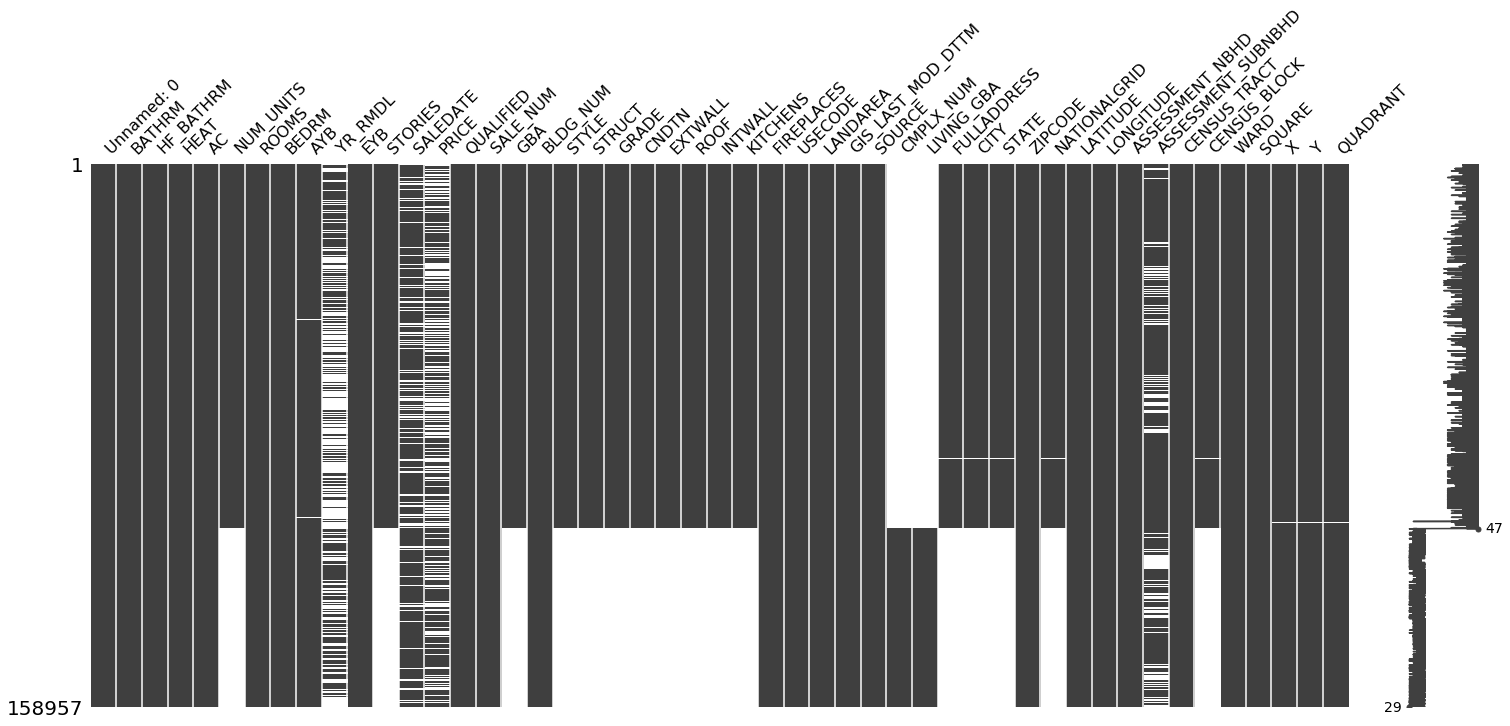

In [2]:
missingno.matrix(df)
plt.show()

> It can be seen that the dataset is rather complete, having a some of the variables mutually exclusive. The variables that appear to have the most missing values are year remodeled, sale date, and price.

#### Seperate the variables by type to analyze seperately

> first the date variables. These need to be converted to datetime format

In [3]:
date_vars = ['SALEDATE','GIS_LAST_MOD_DTTM']
for col in date_vars:
    df.loc[:,col] = pd.to_datetime(df.loc[:,col],format='%Y-%m-%d %H:%M:%S')
    
df.loc[:,date_vars].iloc[:3]

,SALEDATE,GIS_LAST_MOD_DTTM
0,2003-11-25,2018-07-22 18:01:43
1,2000-08-17,2018-07-22 18:01:43
2,2016-06-21,2018-07-22 18:01:43


> In the useless_vars and other_vars, we have irrelevant aggregation variables, redundant variables and variables that aren't relevant to our analyisis

> in region_vars we have variables that could be useful for aggregation later. Note that CENSUS_TRACT is key for the census data shape files we use to visualize regions of the city

> cat_vars are categorical variables. We turn those to string type for sake of standardization

> integer_vars speaks for it self. Variables that are counted or numerical but not continuous like float. These might have to be treated differently because of this.

> float_vars also speaks for itself. These are variables that make sense on a continuous scale and aren't really limited to counted values or discrete intervals.  

In [4]:
useless_vars = ['ZIPCODE','CENSUS_BLOCK','SQUARE','BLDG_NUM']
other_vars = ['FULLADDRESS','CITY','X','Y','NATIONALGRID','CMPLX_NUM','STATE']

region_vars = ['ASSESSMENT_NBHD','ASSESSMENT_SUBNBHD','WARD','QUADRANT','CENSUS_TRACT']

cat_vars = ['HEAT','AC','QUALIFIED','STYLE','STRUCT','GRADE','CNDTN','EXTWALL','ROOF','INTWALL','USECODE']

df.loc[:,cat_vars] = df.loc[:,cat_vars].astype(str)
df.loc[:,cat_vars].iloc[:3]

integer_vars = ['BATHRM','HF_BATHRM','NUM_UNITS','ROOMS',
                'BEDRM','SALE_NUM',
                'KITCHENS','FIREPLACES','STORIES']
df.loc[:,integer_vars] = df.loc[:,integer_vars].astype(float)
df.loc[:,integer_vars].iloc[:3]

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,SALE_NUM,KITCHENS,FIREPLACES,STORIES
0,4.0,0.0,2.0,8.0,4.0,1.0,2.0,5.0,3.0
1,3.0,1.0,2.0,11.0,5.0,1.0,2.0,4.0,3.0
2,3.0,1.0,2.0,9.0,5.0,3.0,2.0,4.0,3.0


In [5]:
float_vars = ['LATITUDE','LONGITUDE','PRICE','GBA','LIVING_GBA','LANDAREA','AYB','YR_RMDL','EYB']
df.loc[:,float_vars] = df.loc[:,float_vars].astype(float)
df.loc[:,float_vars].iloc[:3]

,LATITUDE,LONGITUDE,PRICE,GBA,LIVING_GBA,LANDAREA,AYB,YR_RMDL,EYB
0,38.914680,-77.040832,1095000.0,2522.0,NaN,1680.0,1910.0,1988.0,1972.0
1,38.914683,-77.040764,NaN,2567.0,NaN,1680.0,1898.0,2007.0,1972.0
2,38.914684,-77.040678,2100000.0,2522.0,NaN,1680.0,1910.0,2009.0,1984.0


In [6]:
sorted_vars = np.unique(float_vars + integer_vars + cat_vars + useless_vars + other_vars + date_vars)
useful_vars = np.unique(float_vars + integer_vars + cat_vars + date_vars + region_vars)

> Next we compile the data into seperate dataframes and cleaning them before merging into a cleaned dataframe. Then we save the clean dataframe. One dataframe has only 

In [7]:
# Create dataframe with all useful variables and save to file
df_useful = df.loc[:,useful_vars].copy()
df_useful.loc[:,'AREA'] = df.loc[:,['GBA','LIVING_GBA']].sum(axis=1)
df_useful = df_useful.drop(['GBA','LIVING_GBA','NUM_UNITS','STORIES'],axis='columns')
df_useful.loc[:,'SALEYEAR'] = [x.year for x in df_useful.SALEDATE]
df_useful.loc[:,'TSEYB'] = df_useful.loc[:,'SALEYEAR'] - df_useful.loc[:,'EYB']
df_useful.loc[:,'TSYR_RMDL'] = df_useful.loc[:,'SALEYEAR'] - df_useful.loc[:,'YR_RMDL']
df_useful.loc[df_useful.loc[:,'TSEYB'] < 0] = 0
df_useful.loc[df_useful.loc[:,'TSYR_RMDL'] < 0] = 0
df_useful.loc[:,'PPSF'] = df_useful.PRICE / df_useful.AREA
df_useful.to_csv('../Data/Properties_clean.csv')

> For visualization purposes, we used the census tract shape files. These were changed in with the shp_to_df to a format more compatable with our methods 

In [8]:
import shapefile as shp
def shp_to_df(sf):
    # Extract labels and data
    fields = [x[0] for x in sf.fields[1:]] # Column values
    records = sf.records() # data for dataframe
    shape_data = [x.points for x in sf.shapes()]

    # Create dataframe with values
    df_geo = pd.DataFrame(columns=fields, data=records)
    df_geo['coords'] = shape_data
    
    return df_geo
# First plot: All districts with number inside

    
Shp_path = '../Data/Census_Tracts_in_2010.shp'
sf = shp.Reader(Shp_path)
df_geo = shp_to_df(sf)
df_geo = df_geo.loc[:,['TRACT','coords']]
df_geo.TRACT = df_geo.TRACT.astype(float)
df_geo.columns = ['CENSUS_TRACT','COORDS']

> We wanted to try to model the data to see if we could find some interesting relationships or to see if the data we had was enough to predict the price. So first we needed to pick the variables we were interested in. So we picked the variables that made sense to use. Then we cleaned up the data, changing some variables to better represent relationships we thought we might find, like instead of having the year built and the saledate, we decided to create a variable which represents 'the time since the house was built when it was bought'.

> We onehotencoded all the categorical variables we thought most importand and then combined the data into a common dataframe which could be used with any regression model.


In [9]:
year_var_keep = ['EYB', # The year an improvement was built (likely relationship)
                 'YR_RMDL', # Year structure was remodeled]
                 'SALEDATE']
cat_vars_keep = ['HEAT', #Type of heating
                 'USECODE'] # Requires preprocessing. Take most common types and put rest into own category]

num_vars_keep = ['LATITUDE','LONGITUDE', # Location
                 'PRICE', # Output variable of interest
                 'BATHRM', # Number of bathrooms (Strong relationship)
                 'HF_BATHRM', # Number of half-bathrooms (likely relationship - maybe correlated with bathroom)
                 'BEDRM', # Number of bedrooms (String relationship)
                 'FIREPLACES', # Number of fireplaces (possible relationship, maybe indicator of old house)
                 'LANDAREA']
from sklearn.preprocessing import OneHotEncoder
# Numerical data
df_num = df.loc[:,num_vars_keep].copy().dropna()

# Year-data
df_year = df.loc[:,year_var_keep]
# Turn missing remodel date into year built
# Turn 20 into NA and NA into year built
df_year.loc[df_year.loc[:,'YR_RMDL'] == 20,'YR_RMDL'] = None
df_year.loc[pd.isnull(df_year.loc[:,'YR_RMDL']),'YR_RMDL'] = df_year.loc[pd.isnull(df_year.loc[:,'YR_RMDL']),'EYB']
# Take year of sale
df_year.loc[:,'SALEYEAR'] = [x.year for x in df_year.SALEDATE]
# Replace missing data with the maximum of: the median saledate and the year remodeled 
df_year.loc[df_year.loc[:,'SALEYEAR'].isnull(),'SALEYEAR'] = df_year.loc[:,'SALEYEAR'].median()
df_year.loc[df_year.loc[:,'SALEYEAR'] < df_year.loc[:,'YR_RMDL'],'SALEYEAR'] = df_year.loc[:,'YR_RMDL']
# Create new variables, (time since year built at sale) and (time since remodelling at sale)
df_year.loc[:,'TSEYB'] = df_year.loc[:,'SALEYEAR'] - df_year.loc[:,'EYB']
df_year.loc[:,'TSYR_RMDL'] = df_year.loc[:,'SALEYEAR'] - df_year.loc[:,'YR_RMDL']
df_year.loc[df_year.loc[:,'TSEYB'] < 0] = 0
df_year.loc[df_year.loc[:,'TSYR_RMDL'] < 0] = 0
# keep only saleyear and time since.. variables
df_year = df_year.loc[:,['SALEYEAR','TSEYB','TSYR_RMDL']]


# categorical data
df_cat = df.loc[:,cat_vars_keep].astype(str)
# Use most common heating for categories and put rest to 'other'
most_common_heat = df_cat.HEAT.value_counts().iloc[:4].index.values
most_common_use = df_cat.USECODE.value_counts().iloc[:5].index.values
df_cat.loc[df_cat.loc[:,'HEAT'].isin(most_common_heat) == False,'HEAT'] = 'other'
df_cat.loc[df_cat.loc[:,'USECODE'].isin(most_common_use) == False,'USECODE'] = 'other'
# One hot encoding
ohe = OneHotEncoder(sparse=False).fit(df_cat)
df_cat_OHE = pd.DataFrame(ohe.transform(df_cat),columns=ohe.get_feature_names())

# Aggregation data
df_agg = df.loc[:,region_vars]

# Combine GBA & LIVING_GBA to get more general description: area
df_GBA = df.loc[:,['GBA','LIVING_GBA']]
df_GBA.loc[:,'AREA'] = df_GBA.sum(axis=1)


# Combine dataframe into clean dataframe
df_clean = df_num.join(df_year).join(df_GBA.loc[:,['AREA']])

# Filter based on QUALIFIED
df_clean_index = df_clean.index
df_qualified_index = df.loc[df.QUALIFIED == 'Q'].index
df_clean = df_clean.loc[(df_qualified_index.intersection(df_clean_index))]


> We found that the variable 'USECODE' represented a descriptive category for the type of housing, like if a residence was deteched, semi-detached or in row with other houses. It also describes condominium apartments and whether they are horizontal or vertical (multi story). 

### 3. Data Analysis. <a name="dataAnalysis"></a>
   

### Fundamental distributions of the data. 

- Integer variables

> We looked at bar charts of integer variables and grouped them by residential and condomonium. This was mainly to get a sense for the overall distribution of the data as well as to compare the two types of real estate. 


> We see that some variables, like NUM_UNITS and KITCHENS are mutually exclusive between the two property types, so these might be removed.  

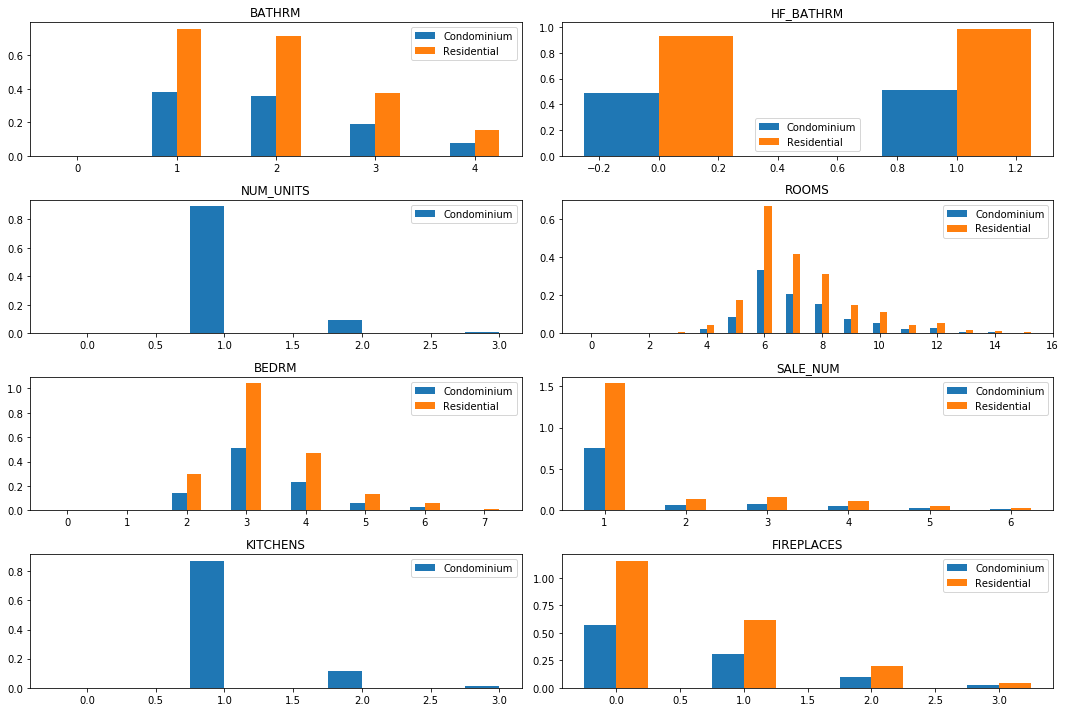

In [10]:
f,axes = plt.subplots(len(integer_vars)//2,2,figsize=(15,10))
axes = np.ravel(axes)
for ax,col in zip(axes,integer_vars):
#     print(col)
    tmp_data = df.loc[:,col]
    tmp_data = tmp_data[tmp_data < tmp_data.quantile(0.995)]
    tmp_data_cond = tmp_data.loc[df.loc[:,'SOURCE'] == 'Residential']
    tmp_data_res = tmp_data.loc[df.loc[:,'SOURCE'] == 'Condominium']
    cond_counts = tmp_data_cond.value_counts()
    res_counts = tmp_data_res.value_counts()
    width = 0.5
    if len(tmp_data_cond) > 0:
        ax.bar(cond_counts.index-width/4,cond_counts/len(tmp_data_cond),width=width/2)
    if len(tmp_data_res) > 0:
        ax.bar(cond_counts.index+width/4,cond_counts/len(tmp_data_res),width=width/2)
    
    ax.legend(['Condominium','Residential'])
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

- float variables 

> We also look at the distribution of the float variables, to get a sense for their distribution as well as compare between the types of real estate

> we see that their location distribution is a bit different. The price distribution is mostly the same. We see that GBA (Gross building area) and LIVING_GBA are mutually exclusive but not too dissimilar in shape, but quite dissimilar in range. 

> LANDAREA is (not surprisingly) much larger for residential real estate. 


In [11]:
# Return range of non-outleries based on outliers being outside Q1 - IQR*1.5 and Q3 + IQR*1.5
def outlier_range(tmp_df,coeff = 1.5):
    tmp_df = tmp_df.copy().dropna()
    Q1 = tmp_df.dropna().quantile(0.25)
    Q3 = tmp_df.dropna().quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - IQR*coeff
    upper = Q3 + IQR*coeff
    df_filt = tmp_df.copy()
    df_filt = df_filt[(df_filt>lower) & (df_filt<upper)]
    return (np.min(df_filt),np.max(df_filt))

C:\Users\Sverrir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


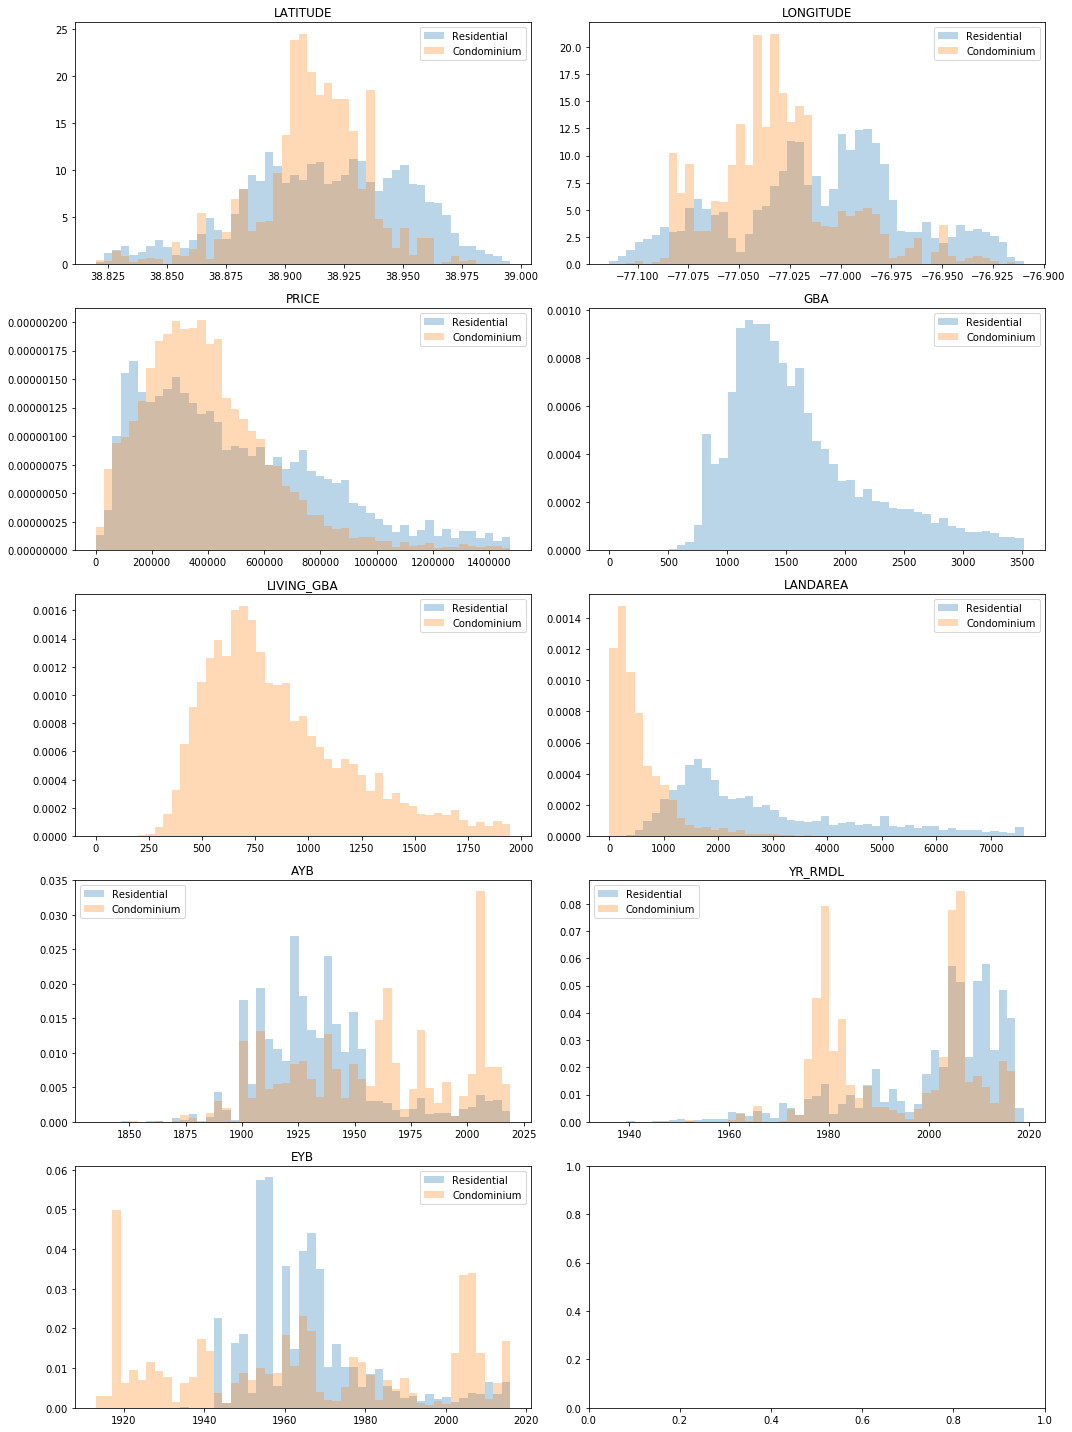

In [12]:
f,axes = plt.subplots(len(float_vars)//2+len(float_vars)%2,2,figsize=(15,len(float_vars)//2*5))
axes = np.ravel(axes)
for ax,col in zip(axes,float_vars):
    tmp_data = df.loc[:,col]
    lower,upper = outlier_range(tmp_data,2)
    
    tmp_data_res = tmp_data.loc[df.loc[:,'SOURCE'] == 'Residential'].dropna()
    tmp_data_cond = tmp_data.loc[df.loc[:,'SOURCE'] == 'Condominium'].dropna()
    
    bins = np.linspace(lower,upper,50)
    
    
    ax.hist(tmp_data_res,alpha=0.3,bins=bins,density=True)
    ax.hist(tmp_data_cond,alpha=0.3,bins=bins,density=True)
    ax.legend(['Residential','Condominium'])
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

### Machine learning analysis
> Using the data we had earlier pre-processed, we trained a random forrest regressor. We did some cross validation and found that the number of estimators (Trees) didn't really affect the results, but more trees means more loading time. So we used 5 esitmators.

> First results showed that the r2 coefficient was really good for both testing and training, although much higher for training. This indicated that a lot of the price could be explained. However, when we looked at the residuals, we found there were really big outliers which couln't be explained. 

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV,train_test_split,cross_val_score,KFold
from sklearn.metrics import r2_score
X = df_clean.drop('PRICE',axis=1)
y = df_clean.loc[:,'PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [14]:
reg = RandomForestRegressor(n_estimators=5)
reg.fit(X_train,y_train)
y_pred_test = reg.predict(X_test)
y_pred_train = reg.predict(X_train)
print('test score:',r2_score(y_test,y_pred_test))
print('train score:',r2_score(y_train,y_pred_train))

test score: 0.8137085060734564
train score: 0.9607113796722448


In [15]:
y_pred = reg.predict(X_test)
residuals_df = X_test.copy()
residuals_df.loc[:,'Price'] = y_test
residuals_df.loc[:,'Predicted price'] = y_pred
residuals_df.loc[:,'Residuals'] = y_pred - y_test

Text(0.5, 1.0, 'Residuals of predicted prices')

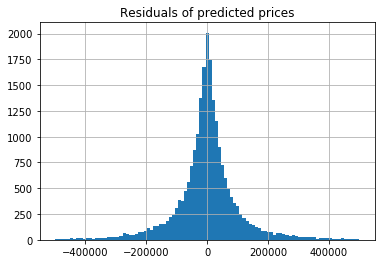

In [16]:
residuals_df.loc[:,'Residuals'].hist(bins=np.linspace(-.5e6,.5e6,100))
plt.title('Residuals of predicted prices')

> We can see for example that an apartment which has 1 bathroom, 1 bedroom and a larger than average landarea, 33 years old when bought and small apartment was selling for 6.75 million dollars, while estimated to cost a more reasonable 607 thousand dollars.

> We can also see that an apartment which has 5 bedrooms, two bathrooms, and around average size was predicted to cst around 204 thousand dollars, but sold for 250. This probably means the sale was unqualified, (i.e. not sold at fair market price) so we can't really look much into why this house in particular sold for so little. The same goes for many other cases.

> What we must therefore accept is that is that analysis of individual cases is out of question. We decided to not focus on individual houses or sales, but rather to aggregate the anaylsis to regions. Because we had the sensus tract shape files and because neighbourhoods can just as well be arbitrarily drawn, we thought they might just as well be used to analyze regions. 


In [17]:
residuals_df.sort_values(by='Residuals',ascending=True).iloc[:3]

,LATITUDE,LONGITUDE,BATHRM,HF_BATHRM,BEDRM,FIREPLACES,LANDAREA,SALEYEAR,TSEYB,TSYR_RMDL,AREA,Price,Predicted price,Residuals
20685,38.911670,-77.056612,6.0,5.0,9.0,4.0,155905.0,2013.0,27.0,0.0,10110.0,22000000.0,10435000.0,-11565000.0
18871,38.908981,-77.067111,1.0,0.0,1.0,0.0,7968.0,2011.0,33.0,33.0,868.0,6750000.0,730800.0,-6019200.0
153487,38.924504,-77.055681,3.0,1.0,4.0,0.0,4306.0,2017.0,89.0,0.0,4403.0,8400000.0,3305000.0,-5095000.0


In [18]:
sort_index = (residuals_df.loc[:,'Predicted price'] / residuals_df.loc[:,'Price']).sort_values(ascending=False).index
residuals_df.loc[sort_index,:].iloc[:3]

,LATITUDE,LONGITUDE,BATHRM,HF_BATHRM,BEDRM,FIREPLACES,LANDAREA,SALEYEAR,TSEYB,TSYR_RMDL,AREA,Price,Predicted price,Residuals
48414,38.928385,-77.030679,2.0,0.0,5.0,0.0,2417.0,1999.0,39.0,11.0,2281.0,250.0,182400.0,182150.0
97504,38.852633,-76.967377,2.0,2.0,3.0,0.0,3006.0,2005.0,0.0,0.0,1200.0,4850.0,152220.4,147370.4
90112,38.893582,-76.916672,3.0,0.0,3.0,0.0,3500.0,2012.0,0.0,0.0,1749.0,22000.0,346477.0,324477.0


### 4. Genre. <a name="genre"></a>
 * **Which genre of data story did you use?**
     > We wanted the benefits of <b>annotated charts</b> and the <b>slide show</b> genres, but with the technology available we found it made more sense to reduce the slide show to a scroll-down page with labeled sections and a discussion/annotations before each visualization.
 
 * **Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?**
     > The tools we used from the 3 categories of Visual Narrative were 
     * Visual structuring category
         * Consistent visual platform
     * Highlighting category
         * Feature distinction
 * **Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?**
    > The tools we used from the Narrative Structure
    * Ordering category
        * Linear
    * Interactivity category
        * Hover highlighting / Details
        * Filtering / Selection
        * Explicit Instruction 
    * Messaging category
        * Captions / Headlines
        * Accompanying Article
        * Comment repition
        * Introductory text

### 5. Visualizations. <a name="visualizations"></a>

##### Section 1
> We wanted the user to first get a rough idea about the diversity of the city and perhaps ever get a feeling for what to expect from the narrative to come. That's why we chose to first present an overview of some interesting variables that showed how dynamic the city was with respect to differeny characteristics of houses.

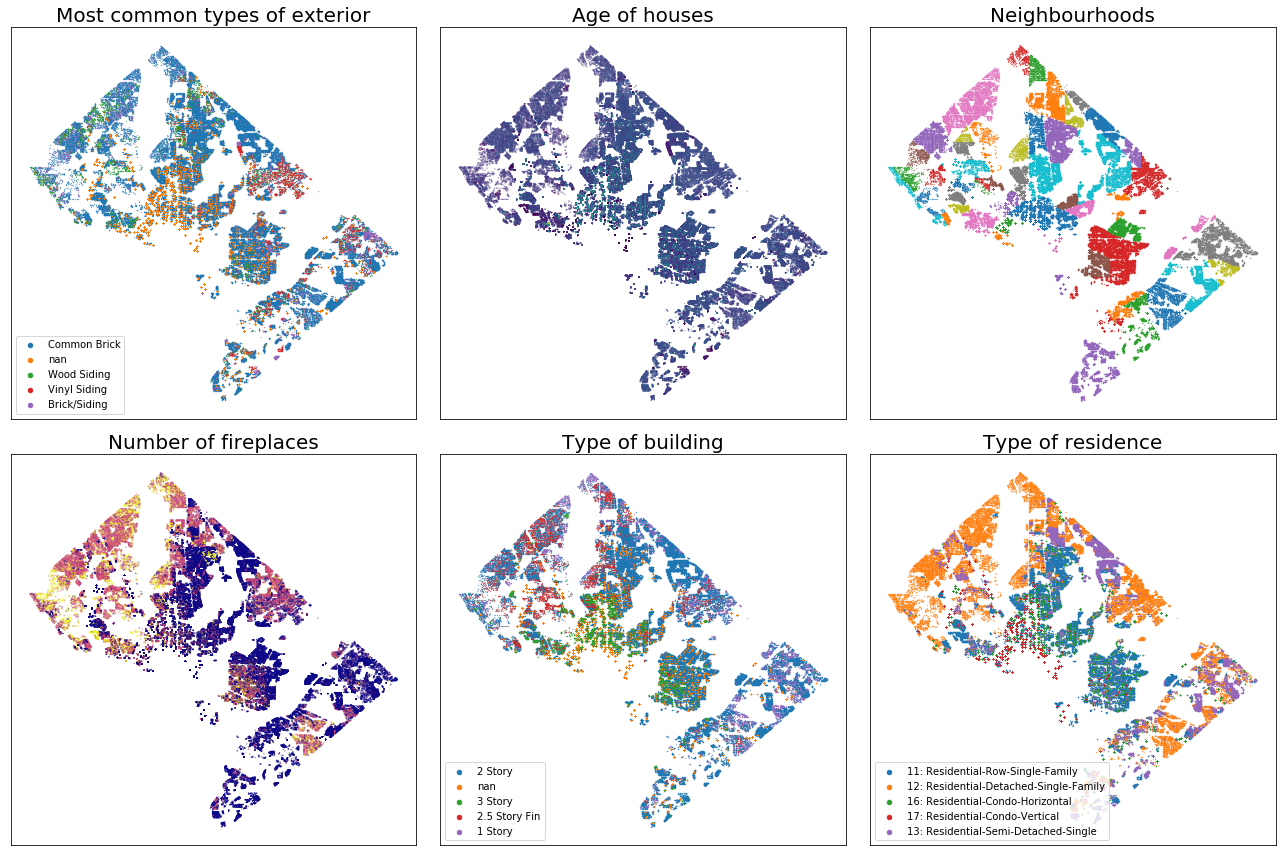

In [19]:
## Slide 1 (the first slide should be something that demonstrates the abundance of the data we have available)
###This could be a scatter plot, perhaps with the size of the appartment as the size 
### of the circle and then some categorical variable for the colors. 
### So brick houses would be red, and aluminium corregated sheets would be grey, etc.

subset = df_useful[df_useful.AREA < df_useful.AREA.quantile(0.99)].copy()
subset = subset[subset.EYB < subset.EYB.quantile(0.95)]
subset = subset[subset.EYB > subset.EYB.quantile(0.05)]
subset = subset[subset.FIREPLACES < subset.FIREPLACES.quantile(0.99)]

use_code_dict = {1: 'Residential-Single Family',
                 2: 'Residential-Multi-Family',
                 3: 'Residential-Transient',
                 4: 'Commercial-Retail',
                 5: 'Commercial-Office',
                 6: 'Commercial-Specific Purpos',
                 7: 'Industrial',
                 8: 'Special Purpos',
                 11: 'Residential-Row-Single-Family',
                 12: 'Residential-Detached-Single-Family',
                 13: 'Residential-Semi-Detached-Single',
                 14: 'Residential-Garage',
                 15: 'Residential-Mixed Use use eligible',
                 16: 'Residential-Condo-Horizontal',
                 17: 'Residential-Condo-Vertical',
                 18: 'Residential-Condo-Garage dently of another unit',
                 19: 'Residential-Single-Family-Misc',
                 21: 'Residential-Apartment-Walk-Up',
                 22: 'Residential-Apartment-Elevator',
                 23: 'Residential Flats 1-5 families',
                 24: 'Residential-Conversions 1-5 families',
                 25: 'Residential-Conversion-5 Units',
                 26: 'Residential-Cooperative-Horizontal floors; may have accessory uses',
                 27: 'Residential-Cooperative-Vertical oors; may have accessory uses',
                 29: 'Residential-Multifamily, Misc',
                 31: 'Hotel-Small',
                 15: 'rooms or less'}

f,ax = plt.subplots(2,3,figsize=(18,12))
ax = np.ravel(ax)




ax[1].scatter(subset.LONGITUDE,subset.LATITUDE,c = (subset.EYB.max() - subset.EYB),s=0.05)
ax[3].scatter(subset.LONGITUDE,subset.LATITUDE,c=subset.FIREPLACES,s=0.05,cmap='plasma')

for ext in subset.EXTWALL.value_counts().index[:5]:
    ax[0].scatter(subset[subset.EXTWALL == ext].LONGITUDE,subset[subset.EXTWALL == ext].LATITUDE,s = 0.05)
for nbh in subset.ASSESSMENT_NBHD.unique():
    ax[2].scatter(subset[subset.ASSESSMENT_NBHD == nbh].LONGITUDE,subset[subset.ASSESSMENT_NBHD == nbh].LATITUDE,s=0.05)
for style in subset.STYLE.value_counts().index[:5]:
    ax[4].scatter(subset[subset.STYLE == style].LONGITUDE,subset[subset.STYLE == style].LATITUDE,s=0.05)
for usecode in subset.USECODE.value_counts().index[:5]:
    ax[5].scatter(subset[subset.USECODE == usecode].LONGITUDE,subset[subset.USECODE == usecode].LATITUDE,s=0.05)

    
lgnd_0 = ax[0].legend(subset.EXTWALL.value_counts().index[:5],
                      markerscale=20,fontsize=10,loc='lower left')
lgnd_4 = ax[4].legend(subset.STYLE.value_counts().index[:5],
                      markerscale=20,fontsize=10,loc='lower left')
lgnd_5 = ax[5].legend([str(x) +': ' + use_code_dict[int(x)] for x in subset.USECODE.value_counts().index[:5]],
                      markerscale=20,fontsize=10,loc='lower left')

for ax_i in ax:
    ax_i.set_xticks([])
    ax_i.set_yticks([])
    
ax[0].set_title('Most common types of exterior',fontsize=20)
ax[1].set_title('Age of houses',fontsize=20)
ax[2].set_title('Neighbourhoods',fontsize=20)
ax[3].set_title('Number of fireplaces',fontsize=20)
ax[4].set_title('Type of building',fontsize=20)
ax[5].set_title('Type of residence',fontsize=20)

plt.tight_layout()
plt.savefig('slide 1')
plt.show()

##### Section 2
> We decided to start the analyis with the most obvious information that the reader would want to know: "What are the most expensive and cheapest regions of the city" So we decided to have an interactive plots that let's the reader not only see pricy and inexpensive regions on a map, but also let them click on the map to see a distribution of the prices available in each neighbourhood. See 

> See apendix containing Bokeh plot code [\[here\]](https://nbviewer.jupyter.org/github/goh12/socialdataanalysis2020-finalproject/blob/master/Explanatory/merged_visualization_code.ipynb#section2)

##### Section 3

> Before we showed the viewer the interactive plot to view the price in each region, we wanted to visualize just how strong the relationship between price and size of an apartment is. So to do this, it's best to pick the simplest and most easily understood visualization for comparing the covariance of two distributions: *The scatter plot*

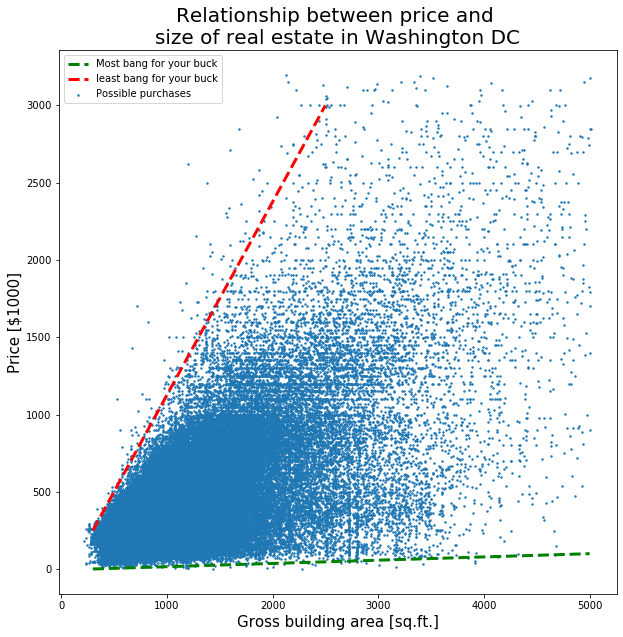

In [20]:
plt.figure(figsize=(10,10))
df_tmp = df_clean[(df_clean.AREA < df_clean.AREA.quantile(0.995)) & 
                  (df_clean.PRICE < df_clean.PRICE.quantile(0.9955))]
plt.scatter(df_tmp.AREA,df_tmp.PRICE/1000,alpha=1,s=2)
plt.plot([300,5000],[1_000/1000,100_000/1000],c='green',linestyle='--',linewidth=3)
plt.plot([300,2500],[250_000/1000,3_000_000/1000],c='red',linestyle='--',linewidth=3)
plt.legend(['Most bang for your buck','least bang for your buck','Possible purchases'])
plt.title('Relationship between price and \nsize of real estate in Washington DC',fontsize=20)
plt.xlabel('Gross building area [sq.ft.]',fontsize=15)
plt.ylabel('Price [$1000]',fontsize=15)
plt.savefig('Slide 2')

> Now that the viewer has some expectations about the price in each region, we want to take them a bit deeper and introduce them to the concepts we later want to introduce, which is that the price only tells you half the story. If you want to get the most for your money, you can't just consider the overall price, but rather the value you get for that price. We allowed the user to not just see the average price per square foot, but like earlier, to be able to click on a region and see the distribution. That way, they can see that even in the more expensive regions, there might be some good deals and vice versa.

> See apendix containing Bokeh plot code [\[here\]](https://nbviewer.jupyter.org/github/goh12/socialdataanalysis2020-finalproject/blob/master/Explanatory/merged_visualization_code.ipynb#section3)

##### Section 4
> We wanted to quickly show the user that just like with price per square foot, other variables come into play. Becase a number of bedrooms is very often a limiting factor for families looking for a house with enough bedrooms for their size of family and because poor students aren't looking for the best value with their money, they are looking for the cheapest apartments they can find. Therefore we thought this would be a variable of interest to look at. We wanted to allow the user to be able filter the map to show the average price of houses with a specific number of bedrooms. This is also interesting, because the cheapest neighbourhood changes when you do this for different numbers of rooms

> See apendix containing Bokeh plot code [\[here\]](https://nbviewer.jupyter.org/github/goh12/socialdataanalysis2020-finalproject/blob/master/Explanatory/merged_visualization_code.ipynb#section4)

##### Section 5



> We wanted to give the reader a bit more context before we gave them the map that shows price for a specific range of houses. So we did some research to see what the estimated cost of maintanence can for houses, based on their age.


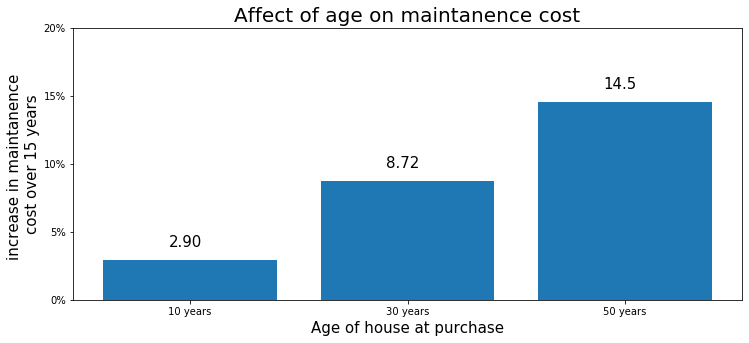

In [25]:
def maintanence_cost(area,age,n_years):
    return sum([area*(1.01+0.03/10*(i+age)) for i in range(n_years)])

plt.figure(figsize=(12,5))
p0 = maintanence_cost(1,10,15)/maintanence_cost(1,0,15)-1
p1 = maintanence_cost(1,30,15)/maintanence_cost(1,0,15)-1
p2 = maintanence_cost(1,50,15)/maintanence_cost(1,0,15)-1
plt.bar(['10 years','30 years','50 years'],[p0*100,p1*100,p2*100])
plt.text(0-0.1,p0*100+1,s=str(p0*100)[:4],fontsize=15)
plt.text(1-0.1,p1*100+1,s=str(p1*100)[:4],fontsize=15)
plt.text(2-0.1,p2*100+1,s=str(p2*100)[:4],fontsize=15)
plt.ylim(0,20)
plt.yticks(np.arange(0,22,5),[str(x)+'%' for x in np.arange(0,22,5)],fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Age of house at purchase',fontsize=15)
plt.ylabel('increase in maintanence \ncost over 15 years',fontsize=15)
plt.title('Affect of age on maintanence cost',fontsize=20)
plt.savefig('Slide 5')

> We wanted to include this plot to give the reader a sense of how much age affects the price of a house after also showing them how much they can cost to maintain. This is a crucial part of picking a new house, so we thought it was appropriate to include some discussion and a visualization about this data. 

> See apendix containing Bokeh plot code [\[here\]](https://nbviewer.jupyter.org/github/goh12/socialdataanalysis2020-finalproject/blob/master/Explanatory/merged_visualization_code.ipynb#section5)

##### Section 6
> We thought that before we let the user play with the 'type of property' filter, that it was good to give some context as to why that's a characteristic that would be useful to look at regionally. That's why we thought it be a good idea to show how different types of houses are distributed accross the city in very clear clusters of similar types of houses. We thought it also good to emphasize with the jitter that on each red 'point' there were actually a lot of appartments that were labeled with the same GPS coordinates. 

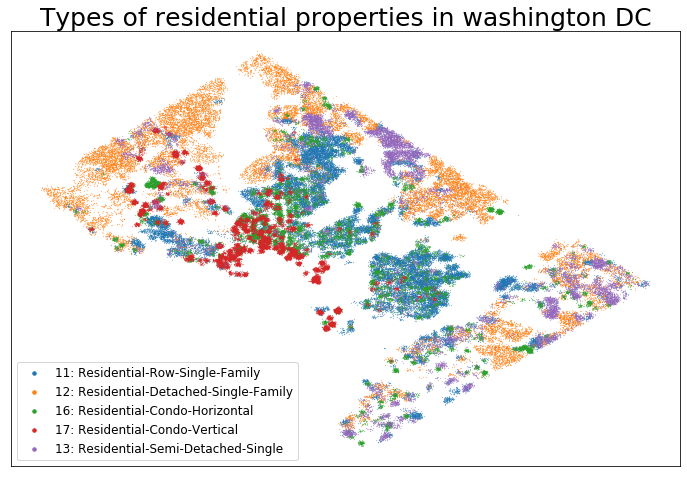

In [26]:
plt.figure(figsize=(12,8))
for usecode in subset.USECODE.value_counts().index[:5]:
    x_micro_jitter = np.random.normal(0,1,len(subset[subset.USECODE == usecode]))*0.0005
    y_micro_jitter = np.random.normal(0,1,len(subset[subset.USECODE == usecode]))*0.0005
    plt.scatter(subset[subset.USECODE == usecode].LONGITUDE+x_micro_jitter,
                subset[subset.USECODE == usecode].LATITUDE+y_micro_jitter,
                s=0.03)
plt.legend([str(x) +': ' + use_code_dict[int(x)] for x in subset.USECODE.value_counts().index[:5]],
           markerscale=20,fontsize=12,loc='lower left')

plt.xticks([])
plt.yticks([])
plt.title('Types of residential properties in washington DC',fontsize=25)
plt.savefig('Slide 6')

> We wanted to give context before we introduced the final plot in section 8, that the type and size of house you should be buying was regional and that this also made sense since each type of building more or less common in certain regions. It would, for example, be very strange if a detatched residential house was the best value for your money in the down-town area where there are possibly houndreds or thousands of condominium apartments in the area and the average price of real-estate was higher than average, which means that every bit of land would have to be utilized more in these areas than in the suburbs. 

> See apendix containing Bokeh plot code [\[here\]](https://nbviewer.jupyter.org/github/goh12/socialdataanalysis2020-finalproject/blob/master/Explanatory/merged_visualization_code.ipynb#section6)

##### Section 7
> We wanted to bring together the whole analyis by finding what type of house and with that number of rooms you should be looking for in each census tract if you want the lowest price per square foot. We aggregated the data to look at the median price per square foot for each combination of usecode and number of bedrooms. We also removed combinations with less than 20 total apartments in each tract to lessen the likelihood of a few individual outliers affecting the whole tract. 


In [23]:
df_CT_BD_agg = df_useful.groupby(['CENSUS_TRACT','BEDRM','USECODE'],as_index=False).agg({'PPSF':'median','AC':'count'})

CT_min = pd.DataFrame(index = df_CT_BD_agg.CENSUS_TRACT.unique())
CT_min.loc[:,'PPSF'] = None
CT_min.loc[:,'USECODE'] = None
CT_min.loc[:,'BEDRM'] = None

for CT in df_CT_BD_agg.CENSUS_TRACT.unique().astype(int):
    CT_subset = df_CT_BD_agg.loc[df_CT_BD_agg.CENSUS_TRACT == CT]
    CT_subset = CT_subset[CT_subset.AC >= 20].dropna()
    if len(CT_subset) > 0:
        idx_min = CT_subset.PPSF.idxmin()
        CT_min.loc[CT,'USECODE'] = CT_subset.loc[idx_min,'USECODE']
        CT_min.loc[CT,'BEDRM'] = CT_subset.loc[idx_min,'BEDRM']
        CT_min.loc[CT,'PPSF'] = CT_subset.loc[idx_min,'PPSF']

CT_min.loc[:,'CENSUS_TRACT'] = CT_min.index
CT_min.index = np.arange(0,len(CT_min))
joined_df = pd.merge(CT_min,df_geo,on='CENSUS_TRACT')
joined_df = joined_df.dropna()

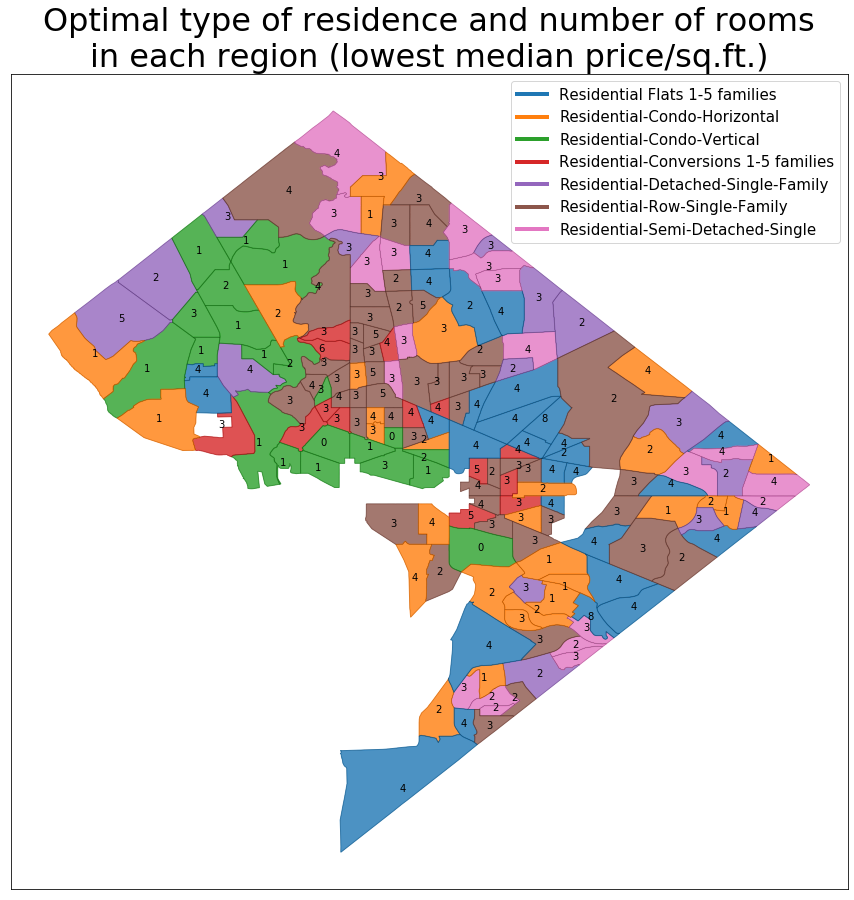

In [31]:
def centroid(vertexes):
    _x_list = [vertex [0] for vertex in vertexes]
    _y_list = [vertex [1] for vertex in vertexes]
    x_weights = np.abs(np.diff(_x_list))
    y_weights = np.abs(np.diff(_y_list))
    
    _x_list = np.mean(np.array([_x_list[1:],_x_list[:-1]]),axis=0)
    _y_list = np.mean(np.array([_y_list[1:],_y_list[:-1]]),axis=0)
    _len = len(vertexes)
    _x = np.sum(_x_list*x_weights/np.sum(x_weights))
    _y = np.sum(_y_list*y_weights/np.sum(y_weights))
    return(_x, _y)

cyc = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
       '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
       '#bcbd22', '#17becf']

color_dict_usecode = {'Residential Flats 1-5 families':cyc[0],
                      'Residential-Condo-Horizontal':cyc[1],
                      'Residential-Condo-Vertical':cyc[2],
                      'Residential-Conversions 1-5 families':cyc[3],
                      'Residential-Detached-Single-Family':cyc[4],
                      'Residential-Row-Single-Family':cyc[5],
                      'Residential-Semi-Detached-Single':cyc[6]}

plt.figure(figsize=(15,15))
for n,(index,val) in enumerate(joined_df.iterrows()):
    x,y = np.array(val.COORDS).T
    plt.fill(x,y,c=color_dict_usecode[use_code_dict[int(val.USECODE)]],alpha=0.8)
    plt.plot(x,y,color='black',linewidth=0.1)    
    
    x_t,y_t = centroid(np.array([x,y]).T)
    plt.text(x_t-0.0015,y_t-0.0005,val.BEDRM.astype(int))
    

plt.title('Optimal type of residence and number of rooms\nin each region (lowest median price/sq.ft.)',fontsize=32)
plt.xticks([])
plt.yticks([])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cyc[0], lw=4),
                Line2D([0], [0], color=cyc[1], lw=4),
                Line2D([0], [0], color=cyc[2], lw=4),
                Line2D([0], [0], color=cyc[3], lw=4),
                Line2D([0], [0], color=cyc[4], lw=4),
                Line2D([0], [0], color=cyc[5], lw=4),
                Line2D([0], [0], color=cyc[6], lw=4)]

plt.legend(custom_lines, color_dict_usecode.keys(),fontsize=15)
plt.savefig('final')

### 6. Discussion. <a name="discussion"></a>
 * **What went well?**
    > Our intial preprocessing and data anlaysis went well. A lot of interesting discoveries were made early in the project. 
    
    > Given that our dataset was already pretty well pre-processed, we found that it was easy to quickly get a sense for which variables mattered the most and what was possible for the assignment. 
    
 * **What is still missing? What could be improved?, Why?**
     > We decided not to go too deeply into the modelling and prediction of housing price since we found with our preliminary analysis that there were too many outliers and special cases where it was unclear whether we should count a given sale is valid or not. For example, some houses were sold for 250 dollars to 40.000 dollars, which isn't even close to the market value of the land the house sits on, let alone the house as well. Another reason for not focusing too much on the modelling was that we could quickly lose interpretability with a model any more complex than a linear regression model since feature importances from models like random forest are affected by colinearity 
     
     >  We could have also looked at the effect of many more variables, like the types of rooms in each apartment, like bathrooms, half-bathrooms, kitchens and so on, but we had to put a stop somewhere or the analysis could have continued way past the scope of this assignment. 

### 7. Contributions. <a name="contributions"></a>
 * **You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually, there is someone who took a lead role on certain portions of the work. That's what you should explain).**
     > Sverrir Heiðar Davíðsson was responsible for the pre-processing and data exploration. He crafted a narrative that made sense using the data and created mockups of the desired visuals for the website. 
     
     > Guðmundur Óskar Halldórsson was responsible for implementing the visualizations in bokeh, making them interactive, figuring out and putting together a functioning server that allows for the use of interactive bokeh plots and creating the website. 
     
     > Both team members cooperated with most parts of the assignment, but the responsability was split in the way described above.  